In [1]:
import pandas as pd
import numpy as np
import datetime

import recommendate
import table_operations
import initialize

In [2]:
# load the tables
channels = pd.read_csv('../data/channels.csv')
comments = pd.read_csv('../data/comments.csv')
content = pd.read_csv('../data/content.csv')
users = pd.read_csv('../data/users.csv')
country_data = pd.read_csv('../data/behavior_generated/country_data_cleaned.csv')
sleep_data = pd.read_csv('../data/behavior_generated/sleep_hours_by_age_country.csv')
work_data = pd.read_csv('../data/behavior_generated/work_behavior.csv')

In [3]:
print(users.columns.to_list())

['user_id', 'user_name', 'user_bed_time', 'user_wake_time', 'user_lunch_time', 'user_dinner_time', 'user_exercise_time', 'user_work_time', 'user_free_from_work_time', 'user_work_days', 'user_age', 'user_gender', 'user_location', 'user_language', 'user_ocupation', 'user_education', 'user_video_watching_time', 'user_video_retention_time']


In [4]:
total_population = country_data['Population'].sum()
country_data['Population_Fraction'] = country_data['Population'] / total_population
probabilities_country = country_data['Population_Fraction'].values

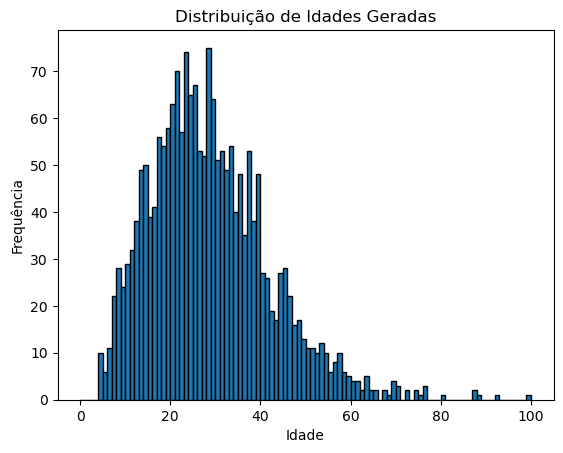

In [28]:
def gerar_idades(tamanho=2000, n=5, p=0.15):
    # Gera idades aleatórias com uma distribuição binomial negativa
    idades = np.random.negative_binomial(n, p, tamanho)
    
    # Ajuste para limitar as idades entre 0 e 100 anos
    idades = np.clip(idades, 4, 100)
    
    return idades

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()
idades_geradas = gerar_idades()
plt.hist(idades_geradas, bins=range(101), edgecolor='black')
plt.title("Distribuição de Idades Geradas")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

In [30]:
work_data_jobs = work_data[~work_data['ocupation'].isin(['Estudante pré-escola', 'Estudante ensino fundamental I', 'Estudante ensino fundamental II', 'Estudante ensino médio', 'Estudante universitário'])]
work_data_jobs

,ocupation,category,work_time,free_from_work_time
0,Desenvolvedor de software,Tecnologia,09:00:00,17:00:00
1,Engenheiro de dados,Tecnologia,09:00:00,17:00:00
2,Arquiteto de TI,Tecnologia,09:00:00,17:00:00
3,Administrador de redes,Tecnologia,09:00:00,17:00:00
4,Analista de segurança,Tecnologia,09:00:00,17:00:00
...,...,...,...,...
140,Vendedor,Vendas,09:00:00,17:00:00
141,Representante comercial,Vendas,09:00:00,17:00:00
142,Gerente de vendas,Vendas,09:00:00,17:00:00
143,Supervisor de vendas,Vendas,09:00:00,17:00:00


In [ ]:
from random_username.generate import generate_username

def create_random_user(number_of_users):
    user_location = np.random.choice(country_data['ISO3'], p=probabilities_country, size=number_of_users),
    user_id = [users.shape[0] + i for i in range(number_of_users)]
    user_name = generate_username(number_of_users)
    user_age = np.clip(np.random.negative_binomial(5, 0.15, number_of_users), 4, 100)
    for age in user_age:
        if age < 6:
            user_ocupation = 'Estudante pré-escola'
        elif age < 11:
            user_ocupation = 'Estudante ensino fundamental I'
        elif age < 15:
            user_ocupation = 'Estudante ensino fundamental II'
        elif age < 18:
            user_ocupation = 'Estudante ensino médio'
        elif age < 23:
            user_ocupation = 'Estudante universitário'
        else:
            user_ocupation = np.random.choice(work_data_jobs['ocupation'], size=1)[0]
    user_gender = np.random.choice(['M', 'F'], size=number_of_users)
    'user_bed_time', #
    'user_wake_time', #
    'user_lunch_time', #
    'user_dinner_time', #
    'user_exercise_time', #
    'user_work_time', #
    'user_free_from_work_time', #
    'user_work_days', #
    'user_language', #
    'user_education', #
    'user_video_watching_time', #
    'user_video_retention_time', #'''